In [1]:
import numpy as np
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
from keras.layers import Input, Dense, GaussianNoise, BatchNormalization, Lambda, LayerNormalization
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model
from keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
import keras.models as models
import random as rn
from keras import backend as K
from keras.models import load_model
import matplotlib.pyplot as plt
from numpy import loadtxt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
# from keras.optimizers import Adam
from keras.layers import Dropout 
import matplotlib.pyplot as plt
from keras.utils import np_utils
# for reproducing results
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed 
set_seed(3)
import math
import csv
import random
import time
from keras.layers import Lambda
from keras import backend as K
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
import tensorflow.keras.backend as K
from sklearn.neighbors import KernelDensity
from sklearn.utils import shuffle
from keras.callbacks import ModelCheckpoint
print(10)

10


In [2]:
def reshape_fun2(x,sample_size):
    size = x.shape
    temp = np.zeros((int(size[0]),2,int(size[1]/2)))
    array = np.zeros((int(size[0]),2,int(size[1]/2)))
    for i in range(0,x.shape[0]):
        
        temp[i] = np.reshape(x[i],(2,int(sample_size/2)),order='F')
        array[i] = temp[i]
    return array

In [7]:
def computeJS(X_label0,new_data_label0_rot):
    JS_vec = []
    MSE_vec = []
    for j in range(0,len(new_data_label0_rot[0])):
        xx = new_data_label0_rot[:,j]
        xx1 = xx-min(xx)
        xx2 = xx1/max(xx1)
        yy = X_label0[:,j]
        yy1 = yy-min(yy)
        yy2 = yy1/max(yy1)
        hist1 = (np.histogram(xx2))
        hist1norm = hist1[0]/sum(hist1[0])
        hist2 = (np.histogram(yy2))
        hist2norm = hist2[0]/sum(hist2[0])
    #     print(hist1norm)
    #     print(hist2norm)
        JS = 0
        for k in range(len(hist1norm)):
            if (hist1norm[k]>0) & (hist2norm[k] >0):
#                 JS = JS + hist1norm[k]*math.log(hist1norm[k]/hist2norm[k],2) + hist2norm[k]*math.log(hist2norm[k]/hist1norm[k],2)
                M = 0.5*(hist1norm[k]+hist2norm[k])
                JS = JS + 0.5 * hist1norm[k]*math.log(hist1norm[k]/M,2) + 0.5 * hist2norm[k]*math.log(hist2norm[k]/M,2)
    #     print(JS)
        JS_vec.append(JS)
        len1 = min(len(xx),len(yy))
        zz = np.absolute(xx[0:len1]-yy[0:len1])
        MSE_vec.append(zz)
#     print(np.average(JS_vec))
#     print(np.average(MSE_vec))
    return np.average(JS_vec), np.average(MSE_vec)

In [711]:
# datafile = 'Mod12.npy'
datafile = 'outdoor_dev12.npy'

KDEkernel0 = 'gaussian'
KDEkernel1 = 'gaussian'
dB_sensing = 3
sample_size = 64
bandwidth_sel0 = 0.001 # 0.006 # 0.003 # 0.05 # 0.005 for Gaussian
bandwidth_sel1 = 0.001
theta0 = math.pi/30
theta1 = -math.pi/30
amp0 = 1.3
amp1 = 1.1



# data = np.load('Device_1_2.npy')
# data = np.load('Device_1_2_5000_64_new.npy')
# data = np.load('Config_1_2_5000_64_new.npy')
# data = np.load('Device_1_2.npy')
# data = np.load('config12device1.npy')
# data = np.load('Config_1_2_5000_64.npy')
# data = np.load('rec2dev12.npy')
# data = np.load('outdoor_dev12.npy')
# data = np.load('Mod12.npy')
# data = np.load('config12device2.npy')
# data = np.load('rec2dev12.npy')
data = np.load(datafile)
num_classes = 2
nclasses = num_classes
sample_size = len(data[0])-1
split_ratio = 0.8
np.random.shuffle(data)
dataset = data 

# np.save('data_saved.npy', data)
# If you want to load data:
# data = np.load('data_saved.npy')

X = dataset[:int(len(dataset)*split_ratio),0:sample_size]
    # X = X/np.max(np.absolute(X))
Y1 = dataset[:int(len(dataset)*split_ratio),sample_size]
Y = np_utils.to_categorical(Y1, num_classes)
X_test = dataset[int(len(dataset)*split_ratio):,0:sample_size]
# X_test = X_test/np.max(np.absolute(X_test))
Y_test1 = dataset[int(len(dataset)*split_ratio):,sample_size]
Y_test = np_utils.to_categorical(Y_test1, num_classes)

X_label0 = X[np.where(Y1==0)] 
kde = KernelDensity(kernel = KDEkernel0, bandwidth=bandwidth_sel0).fit(X_label0)
new_data_label0 = kde.sample(len(Y1[Y1==0]), random_state=0)
X_label1 = X[np.where(Y1==1)] 
kde = KernelDensity(kernel = KDEkernel0, bandwidth=bandwidth_sel1).fit(X_label1)
new_data_label1 = kde.sample(len(Y1[Y1==1]), random_state=0)

X_label0test = X_test[np.where(Y_test1==0)] 
kde = KernelDensity(kernel = KDEkernel1, bandwidth=bandwidth_sel0).fit(X_label0test)
new_data_label0test = kde.sample(len(Y_test1[Y_test1==0]), random_state=0)
X_label1test = X_test[np.where(Y_test1==1)] 
kde = KernelDensity(kernel = KDEkernel1, bandwidth=bandwidth_sel1).fit(X_label1test)
new_data_label1test = kde.sample(len(Y_test1[Y_test1==1]), random_state=0)

norm_0 = np.sqrt(np.sum(new_data_label0**2)/np.sum(X_label0**2))
norm_1 = np.sqrt(np.sum(new_data_label1**2)/np.sum(X_label1**2))

new_data_label0 = amp0*new_data_label0/norm_0
new_data_label1 = amp1*new_data_label1/norm_1

new_data_label0test = amp0*new_data_label0test/norm_0
new_data_label1test = amp1*new_data_label1test/norm_1


# new_data_label0 = kde.sample(len(Y1[Y1==1]), random_state=0)
new_data_label0_rot = np.zeros((len(new_data_label0), sample_size))

# new_data_label1 = kde.sample(len(Y1[Y1==1]), random_state=0)
new_data_label1_rot = np.zeros((len(new_data_label1), sample_size))

for k in range(len(new_data_label0)):
    for j in range(int(sample_size/2)):
        c = new_data_label0[k,2*j]
        d = new_data_label0[k,2*j+1]
        cc = c*math.cos(theta0)-d*math.sin(theta0)
        dd = c*math.sin(theta0)+d*math.cos(theta0)
        new_data_label0_rot[k,2*j] = cc
        new_data_label0_rot[k,2*j+1] = dd

for k in range(len(new_data_label1)):
    for j in range(int(sample_size/2)):
        c = new_data_label1[k,2*j]
        d = new_data_label1[k,2*j+1]
        cc = c*math.cos(theta1)-d*math.sin(theta1)
        dd = c*math.sin(theta1)+d*math.cos(theta1)
        new_data_label1_rot[k,2*j] = cc
        new_data_label1_rot[k,2*j+1] = dd   


# new_data_label0test = kde.sample(len(Y1[Y1==0]), random_state=0)
new_data_label0test_rot = np.zeros((len(new_data_label0test), sample_size))

# new_data_label1test = kde.sample(len(Y1[Y1==1]), random_state=0)
new_data_label1test_rot = np.zeros((len(new_data_label1test), sample_size))

for k in range(len(new_data_label0test)):
    for j in range(int(sample_size/2)):
        c = new_data_label0test[k,2*j]
        d = new_data_label0test[k,2*j+1]
        cc = c*math.cos(theta0)-d*math.sin(theta0)
        dd = c*math.sin(theta0)+d*math.cos(theta0)
        new_data_label0test_rot[k,2*j] = cc
        new_data_label0test_rot[k,2*j+1] = dd

for k in range(len(new_data_label1test)):
    for j in range(int(sample_size/2)):
        c = new_data_label1test[k,2*j]
        d = new_data_label1test[k,2*j+1]
        cc = c*math.cos(theta1)-d*math.sin(theta1)
        dd = c*math.sin(theta1)+d*math.cos(theta1)
        new_data_label1test_rot[k,2*j] = cc
        new_data_label1test_rot[k,2*j+1] = dd       

# new_data_label0_rot = new_data_label0
# new_data_label1_rot = new_data_label1
# new_data_label0test_rot = new_data_label0test
# new_data_label1test_rot = new_data_label1test

    

In [59]:
# np.save('Y_testsaved.npy', Y_test)
# np.save('X_saved.npy', X)

In [5]:
# Repeat all classsification results with these datasets loaded

# np.save('X_label0saved.npy', X_label0)
# np.save('X_label1saved.npy', X_label1)
# np.save('new_data_label0_rotsaved.npy', new_data_label0_rot)
# np.save('new_data_label1_rotsaved.npy', new_data_label1_rot)
# np.save('X_label0testsaved.npy', X_label0test)
# np.save('X_label1testsaved.npy', X_label1test)
# np.save('new_data_label0test_rotsaved.npy', new_data_label0test_rot)
# np.save('new_data_label1test_rotsaved.npy', new_data_label1test_rot)

X_label0 = np.load('X_label0saved.npy')
X_label1 = np.load('X_label1saved.npy')
new_data_label0_rot = np.load('new_data_label0_rotsaved.npy')
new_data_label1_rot = np.load('new_data_label1_rotsaved.npy')
X_label0test = np.load('X_label0testsaved.npy')
X_label1test = np.load('X_label1testsaved.npy')
new_data_label0test_rot = np.load('new_data_label0test_rotsaved.npy')
new_data_label1test_rot = np.load('new_data_label1test_rotsaved.npy')

In [21]:
# JSD Calculation
# JSD in training time
mes11, mes2 = computeJS(X_label1,new_data_label1_rot)
mes10, mes2 = computeJS(X_label0,new_data_label0_rot)
print(mes10, mes11, (mes11*len(X_label1)+mes10*len(X_label0))/(len(X_label1)+len(X_label0)))
# JSD in test time
mes11, mes2 = computeJS(X_label1test,new_data_label1test_rot)
mes10, mes2 = computeJS(X_label0test,new_data_label0test_rot)
print(mes10, mes11, (mes11*len(X_label1test)+mes10*len(X_label0test))/(len(X_label1test)+len(X_label0test)))

0.007595306276226199 0.007297692324530657 0.007446201686426733
0.009186486093973916 0.009980724976080078 0.009580428579498573


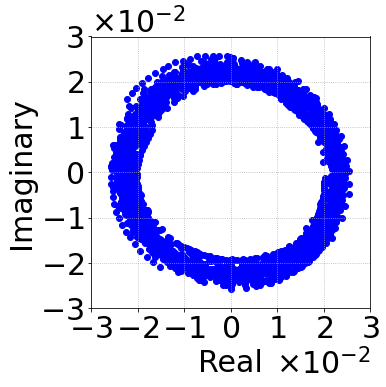

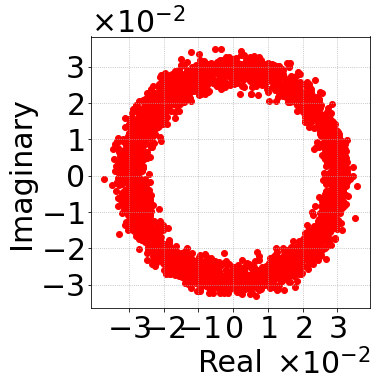

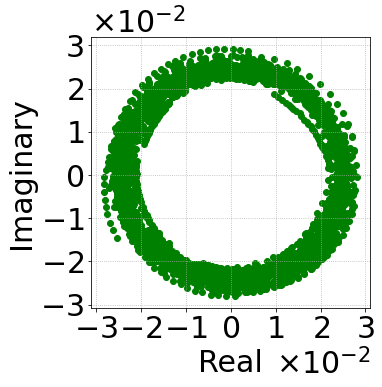

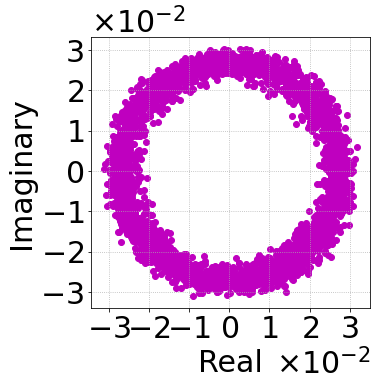

In [18]:
# fig = plt.figure()
plt.rc('font', size=30) 
fig=plt.figure(figsize=(5, 5))
f1 = reshape_fun2(X_label0test[0:100], sample_size)
plt.scatter(f1[:,0], f1[:,1], c = 'b')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.grid(linestyle='dotted')
aa = plt.xticks(np.arange(-0.03,0.03+0.001, 0.01)) 
bb = plt.yticks(np.arange(-0.03,0.03+0.001, 0.01)) 
plt.ticklabel_format(style='sci', axis='x', scilimits=(-2,-2), useMathText=True)
plt.ticklabel_format(style='sci', axis='y', scilimits=(-2,-2), useMathText=True)
# fig=plt.figure(figsize=(15, 15))
# plt.savefig('constellation_real1new.pdf', bbox_inches="tight") 
plt.show()
fig=plt.figure(figsize=(5, 5))
f1 = reshape_fun2(new_data_label0test_rot[0:100], sample_size)
plt.scatter(f1[:,0], f1[:,1], c = 'r')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.grid(linestyle='dotted')
aa = plt.xticks(np.arange(-0.03,0.03+0.001, 0.01)) 
bb = plt.yticks(np.arange(-0.03,0.03+0.001, 0.01)) 
plt.ticklabel_format(style='sci', axis='x', scilimits=(-2,-2), useMathText=True)
plt.ticklabel_format(style='sci', axis='y', scilimits=(-2,-2), useMathText=True)
# plt.savefig('constellation_syn1new.pdf', bbox_inches="tight") 
plt.show()
fig=plt.figure(figsize=(5, 5))
f1 = reshape_fun2(X_label1test[0:100], sample_size)
plt.scatter(f1[:,0], f1[:,1], c = 'g')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.grid(linestyle='dotted')
aa = plt.xticks(np.arange(-0.03,0.03+0.001, 0.01)) 
bb = plt.yticks(np.arange(-0.03,0.03+0.001, 0.01)) 
plt.ticklabel_format(style='sci', axis='x', scilimits=(-2,-2), useMathText=True)
plt.ticklabel_format(style='sci', axis='y', scilimits=(-2,-2), useMathText=True)
# plt.savefig('constellation_real2new.pdf', bbox_inches="tight") 
plt.show()
fig=plt.figure(figsize=(5, 5))
f1 = reshape_fun2(new_data_label1test_rot[0:100], sample_size)
plt.scatter(f1[:,0], f1[:,1], c = 'm')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.grid(linestyle='dotted')
aa = plt.xticks(np.arange(-0.03,0.03+0.001, 0.01)) 
bb = plt.yticks(np.arange(-0.03,0.03+0.001, 0.01))
plt.ticklabel_format(style='sci', axis='x', scilimits=(-2,-2), useMathText=True)
plt.ticklabel_format(style='sci', axis= 'y', scilimits=(-2,-2), useMathText=True)
# plt.savefig('constellation_syn2new.pdf', bbox_inches="tight") 
plt.show()

In [15]:
DNNtype = 'CNN'
realvssyn = 1
# 1 if synthetic vs real over all data
# 0 if original (dev1 vc dev2) classification with real+synthetic  (e.g., device 1 vs device 2)
# - 1 if original classifier for real only 
# -2 original classifier for synthetic only
callbackyesno = 1

num_classes = 2
# data = np.load('data_saved.npy')
sample_size = len(data[0])-1

if realvssyn == 1:
    X0_new = np.concatenate((X_label0, X_label1, new_data_label0_rot, new_data_label1_rot), axis = 0)
    X0_newtest = np.concatenate((X_label0test, X_label1test, new_data_label0test_rot, new_data_label1test_rot), axis = 0)
    Y0_new = np.concatenate((np.zeros(len(X_label0)), np.zeros(len(X_label1)), np.ones(len(new_data_label0_rot)), np.ones(len(new_data_label1_rot))), axis = 0)
    Y0_newtest = np.concatenate((np.zeros(len(X_label0test)), np.zeros(len(X_label1test)), np.ones(len(new_data_label0test_rot)), np.ones(len(new_data_label1test_rot))), axis = 0)
elif realvssyn == 0:
    X0_new = np.concatenate((X_label0, X_label1, new_data_label0_rot, new_data_label1_rot), axis = 0)
    X0_newtest = np.concatenate((X_label0test, X_label1test, new_data_label0test_rot, new_data_label1test_rot), axis = 0)
    Y0_new = np.concatenate((np.zeros(len(X_label0)), np.ones(len(X_label1)), np.zeros(len(new_data_label0)), np.ones(len(new_data_label1))), axis = 0)
    Y0_newtest = np.concatenate((np.zeros(len(X_label0test)), np.ones(len(X_label1test)), np.zeros(len(new_data_label0test)), np.ones(len(new_data_label1test))), axis = 0)
elif realvssyn == -1:
    X0_new = np.concatenate((X_label0, X_label1), axis = 0)
    X0_newtest = np.concatenate((X_label0test, X_label1test), axis = 0)
    Y0_new = np.concatenate((np.zeros(len(X_label0)), np.ones(len(X_label1))), axis = 0)
    Y0_newtest = np.concatenate((np.zeros(len(X_label0test)), np.ones(len(X_label1test))), axis = 0)
elif realvssyn == -2:
    X0_new = np.concatenate((new_data_label0_rot, new_data_label1_rot), axis = 0)
    X0_newtest = np.concatenate((new_data_label0test_rot, new_data_label1test_rot), axis = 0)
    Y0_new = np.concatenate((np.zeros(len(new_data_label0_rot)), np.ones(len(new_data_label1_rot))), axis = 0)
    Y0_newtest = np.concatenate((np.zeros(len(new_data_label0test_rot)), np.ones(len(new_data_label1test_rot))), axis = 0)
elif realvssyn == -3:
    X0_new = np.concatenate((X_label0, X_label1, new_data_label0_rot), axis = 0)
    X0_newtest = np.concatenate((X_label0test, X_label1test, new_data_label0test_rot), axis = 0)
    Y0_new = np.concatenate((np.zeros(len(X_label0)), np.zeros(len(X_label1)), np.ones(len(new_data_label0))), axis = 0)
    Y0_newtest = np.concatenate((np.zeros(len(X_label0test)), np.zeros(len(X_label1test)), np.ones(len(new_data_label0test))), axis = 0)

X0_data, Y0_datax = shuffle(X0_new, Y0_new, random_state=0)
Y0_data = np_utils.to_categorical(Y0_datax, num_classes)

X0_datatest, Y0_datatestx = shuffle(X0_newtest, Y0_newtest, random_state=0)
Y0_datatest = np_utils.to_categorical(Y0_datatestx, num_classes)


X = X0_data
Y = Y0_data 
X_test = X0_datatest
Y_test = Y0_datatest

Y0_datatest = np_utils.to_categorical(Y0_datatestx, num_classes)

dr = 0.1 # dropout rate (%)

if DNNtype == 'CNN':

    # CNN
    Xnew = reshape_fun2(X, sample_size)
    X_testnew = reshape_fun2(X_test, sample_size)
    model = models.Sequential() 
    in_shp = list(np.array(Xnew).shape[1:])

    num_classes = 2
    init_ = 'glorot_uniform'
    model.add(Reshape(in_shp+[1],input_shape=in_shp))
    model.add(ZeroPadding2D((0,2)))
            #model.add(Convolution2D(64, kernel_size=(3,2), strides=(2,1), padding='valid', activation="relu", name="conv1"))
    model.add(Convolution2D(32, kernel_size=(1,3), padding="valid", activation="relu", name="conv2"))
#     model.add(Convolution2D(64, kernel_size=(1,3), padding="valid", activation="relu", name="conv3"))
    model.add(Flatten())
    model.add(Dense(32, activation='relu', name="dense1"))
    model.add(Dropout(dr))
    model.add(Dense(8, activation='relu', name="dense1a"))
    model.add(Dropout(dr))
    model.add(Dense( num_classes,  name="dense2" ))
    model.add(Activation('softmax'))
    model.add(Reshape([num_classes]))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    if callbackyesno == 0:
        model.fit(Xnew, Y, validation_data=(X_testnew,Y_test), epochs=50, batch_size=10,verbose=1)
    
    elif callbackyesno == 1:
    
        #create callback
        filepath = 'my_best_model.hdf5'
        checkpoint = ModelCheckpoint(filepath=filepath, 
                                     monitor='val_loss',
                                     verbose=1, 
                                     save_best_only=True,
                                     mode='min')
        callbacks = [checkpoint]

        #     modelC.summary()
    #     model.fit(Xnew, Y, validation_data=(X_testnew,Y_test), epochs=50, batch_size=10,verbose=1)
        history = model.fit(Xnew, Y, validation_data=(X_testnew,Y_test), epochs=50, batch_size=10,verbose=1, callbacks=callbacks)

    #     #plot the training history
    #     plt.plot(history.history['loss'], label='Training Loss')
    #     plt.plot(history.history['val_loss'], label='Validation Loss')
    #     plt.legend()
    #     plt.xlabel('Epochs')
    #     plt.ylabel('Mean Squared Error')
    #     plt.savefig('model_training_history')
    #     plt.show()

        #Load and evaluate the best model version
        model = load_model(filepath)

#     X_test = X_testnew
#     X = Xnew

elif DNNtype == 'FNN':
    # FNN
    model = models.Sequential() 
    in_shp = list(np.array(X).shape[1:])
            #pdb.set_trace()
            #in_shp = [32,2]
            #     print(in_shp)

    model.add(Dense(64, input_dim=sample_size, activation='relu'))
#     num_classes = 2
#     model.add(Dropout(dr))
    init_ = 'glorot_uniform'
    model.add(Dense(32, activation='relu', name="dense1"))
    model.add(Dropout(dr))
    model.add(Dense(8, activation='relu', name="dense1a"))
    model.add(Dropout(dr))
    model.add(Dense( num_classes,  name="dense2" ))
    model.add(Activation('softmax'))
    model.add(Reshape([num_classes]))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     model.fit(X, Y, validation_data=(X_test,Y_test), epochs=50, batch_size=10,verbose=1)
    
    if callbackyesno == 0:
        model.fit(X, Y, validation_data=(X_test,Y_test), epochs=50, batch_size=10,verbose=1)
    elif callbackyesno == 1:
        filepath = 'my_best_model.hdf5'
        checkpoint = ModelCheckpoint(filepath=filepath, 
                                     monitor='val_loss',
                                     verbose=1, 
                                     save_best_only=True,
                                     mode='min')
        callbacks = [checkpoint]
        history = model.fit(X, Y, validation_data=(X_test,Y_test), epochs=50, batch_size=10,verbose=1, callbacks=callbacks)

        #Load and evaluate the best model version
        model = load_model(filepath)
        #create callback
        X_testnew = X_test
    
        
scorepureclassifiernew = model.evaluate(X_testnew,Y_test, verbose=0)

dd1 = np.argmax(Y0_datatest,axis=1)
dd = np.where(dd1==int(0))
X_testdd = X_testnew[dd]
Y_testdd = Y_test[dd]
scorepureclassifiernew0 = model.evaluate(X_testdd, Y_testdd, verbose=0)
dd1 = np.argmax(Y0_datatest,axis=1)
dd = np.where(dd1==int(1))
X_testdd = X_testnew[dd]
Y_testdd = Y_test[dd]
scorepureclassifiernew1 = model.evaluate(X_testdd, Y_testdd, verbose=0)
print(scorepureclassifiernew[1], scorepureclassifiernew0[1], scorepureclassifiernew1[1])

Epoch 1/50
788/800 [============================>.] - ETA: 0s - loss: 0.5481 - accuracy: 0.7102
Epoch 1: val_loss improved from inf to 0.25608, saving model to my_best_model.hdf5
800/800 [==============================] - 1s 1ms/step - loss: 0.5446 - accuracy: 0.7128 - val_loss: 0.2561 - val_accuracy: 0.9360
Epoch 2/50
786/800 [============================>.] - ETA: 0s - loss: 0.2652 - accuracy: 0.8982
Epoch 2: val_loss improved from 0.25608 to 0.20976, saving model to my_best_model.hdf5
800/800 [==============================] - 1s 992us/step - loss: 0.2648 - accuracy: 0.8986 - val_loss: 0.2098 - val_accuracy: 0.9380
Epoch 3/50
796/800 [============================>.] - ETA: 0s - loss: 0.2259 - accuracy: 0.9210
Epoch 3: val_loss improved from 0.20976 to 0.19596, saving model to my_best_model.hdf5
800/800 [==============================] - 1s 987us/step - loss: 0.2257 - accuracy: 0.9210 - val_loss: 0.1960 - val_accuracy: 0.9390
Epoch 4/50
739/800 [==========================>...] - ETA:

Epoch 29/50
747/800 [===========================>..] - ETA: 0s - loss: 0.1122 - accuracy: 0.9605
Epoch 29: val_loss did not improve from 0.09612
800/800 [==============================] - 1s 941us/step - loss: 0.1152 - accuracy: 0.9589 - val_loss: 0.1051 - val_accuracy: 0.9560
Epoch 30/50
755/800 [===========================>..] - ETA: 0s - loss: 0.1143 - accuracy: 0.9589
Epoch 30: val_loss improved from 0.09612 to 0.09450, saving model to my_best_model.hdf5
800/800 [==============================] - 1s 942us/step - loss: 0.1143 - accuracy: 0.9589 - val_loss: 0.0945 - val_accuracy: 0.9680
Epoch 31/50
766/800 [===========================>..] - ETA: 0s - loss: 0.1086 - accuracy: 0.9621
Epoch 31: val_loss did not improve from 0.09450
800/800 [==============================] - 1s 919us/step - loss: 0.1085 - accuracy: 0.9617 - val_loss: 0.0958 - val_accuracy: 0.9670
Epoch 32/50
767/800 [===========================>..] - ETA: 0s - loss: 0.1129 - accuracy: 0.9587
Epoch 32: val_loss did not im

In [33]:
# Repeat results for attacks

model_class1CNN = keras.models.load_model('model_class1')
model_class2CNN = keras.models.load_model('model_class2')
X_test_class1CNN = np.load('X_test_class1new.npy')
X_test_class2CNN = np.load('X_test_class2new.npy')
Y_test_class1CNN = np.load('Y_test_class1new.npy')
Y_test_class2CNN = np.load('Y_test_class2new.npy')

model_class1FNN = keras.models.load_model('model_class1FNN')
model_class2FNN = keras.models.load_model('model_class2FNN')
X_test_class1FNN = np.load('X_test_class1FNN.npy')
X_test_class2FNN = np.load('X_test_class2FNN.npy')
Y_test_class1FNN = np.load('Y_test_class1FNN.npy')
Y_test_class2FNN = np.load('Y_test_class2FNN.npy')

In [36]:
from keras.models import load_model
# model_class1CNN.save('model_class1CNN.h5')
# model_class2CNN.save('model_class2CNN.h5')
# model_class1FNN.save('model_class1FNN.h5')
# model_class2FNN.save('model_class2FNN.h5')

In [37]:
model_class1CNN = load_model('model_class1CNN.h5')
model_class2CNN = load_model('model_class2CNN.h5')
model_class1FNN = load_model('model_class1FNN.h5')
model_class2FNN = load_model('model_class2FNN.h5')

In [25]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label, model):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = loss_object(input_label, prediction)
        # Get the gradients of the loss w.r.t to the input image.
        gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
    signed_grad =  tf.sign(gradient)
#     signed_grad = gradient
    return signed_grad

def create_adversarial_pattern_joint(input_image, input_label, modelA, modelB, consA):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        predictionA = modelA(input_image)
        lossA = loss_object(input_label, predictionA)
        # Get the gradients of the loss w.r.t to the input image.
        gradientA = tape.gradient(lossA, input_image)
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        predictionB= modelB(input_image)
        lossB = loss_object(input_label, predictionB)
        # Get the gradients of the loss w.r.t to the input image.
        gradientB = tape.gradient(lossB, input_image)
  # Get the sign of the gradients to create the perturbation
    gradient = consA*gradientA + (1-consA)*gradientB
    signed_grad =  tf.sign(gradient)
#     signed_grad = gradient
    return signed_grad

attack success: 0.987
attack success: 0.041
attack success: 0.03
attack success: 0.043
attack success: 0.0305
attack success: 0.048
attack success: 0.031
attack success: 0.0555
attack success: 0.031
attack success: 0.0665
attack success: 0.031
attack success: 0.0865
attack success: 0.032
attack success: 0.135
attack success: 0.0325
attack success: 0.209
attack success: 0.0325
attack success: 0.329
attack success: 0.0345
attack success: 0.414
attack success: 0.0345
attack success: 0.464
attack success: 0.0395
attack success: 0.538
attack success: 0.043
attack success: 0.736
attack success: 0.0455
attack success: 0.9165
attack success: 0.057
attack success: 0.9655
attack success: 0.073
attack success: 0.9825
attack success: 0.1005
attack success: 0.987
attack success: 0.1335
attack success: 0.987
attack success: 0.182
attack success: 0.987
attack success: 0.25
attack success: 0.987
attack success: 0.32
attack success: 0.987
attack success: 0.387


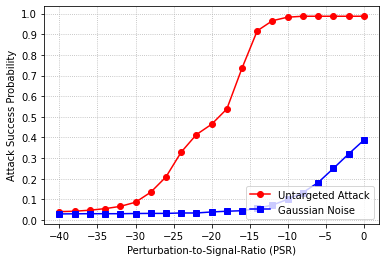

In [39]:
# Untargeted Attack
X_testhere = X_test_class1CNN
Y_testhere = Y_test_class1CNN
modelhere = model_class1CNN
cons_A = 1

modelA = model_class1CNN
modelB = model_class2CNN
# model_other = model_class1

X_tensor = tf.convert_to_tensor(X_testhere)
# Y_test4 = np_utils.to_categorical(Y_test, num_classes)

# delta_tf = create_adversarial_pattern(X_tensor, Y_test, model)

# delta_tf_1 = create_adversarial_pattern(X_tensor, Y_test, model_class1)
# delta_tf_2 = create_adversarial_pattern(X_tensor, Y_test, model_class2)
# delta_tf = cons_A * delta_tf_1 + (1-cons_A) * delta_tf_2

delta_tf = create_adversarial_pattern_joint(X_tensor, Y_testhere, modelA, modelB, cons_A)

delta_np = delta_tf.numpy()
# delta = (delta_np/np.sqrt(np.sum(delta_np**2))) 
# delta = - np.sign(delta_np)
delta = delta_np/math.sqrt(2)
# rec_noise = math.sqrt(1/(2*EbNo_train))*np.random.randn(len(delta),len(delta[0]))
PNR = -3
# epsilon = math.sqrt(2)*10**((PNR - dB_sensing)/20) 
S_dB = 10*math.log10((np.sum(X_testhere**2))/len(X_testhere))
dB_epsilon = S_dB + PNR
epsilon = pow(10,dB_epsilon/10)

epi = epsilon*delta
aa = (modelhere.predict(X_testhere+epi))
bb = np.argmax(aa,axis=1)
cc = np.argmax(Y_test,axis=1)
no_errors = (cc != bb)
no_errors =  no_errors.astype(int).sum()
print('attack success:', no_errors/len(cc))

# as a function of PNR
untargeted_success_vec = []
untargeted_success_vecG = []
dx = delta.shape
if len(dx) == 2:
    Gnoise = (1/math.sqrt(2))*np.random.randn(dx[0],dx[1])
elif len(dx) == 3:
    Gnoise = (1/math.sqrt(2))*np.random.randn(dx[0],dx[1],dx[2])
# Gnoise = (1/math.sqrt(2))*np.random.randn(len(delta),len(delta[0]))
dBrange = -40
for PNR in range(dBrange,1,2):
#     epsilon = math.sqrt(2)*10**((PNR - dB_sensing)/20) 
#     delta_power = np.sum(delta**2)
#     noise_power = (sample_size/2)*len(X_test)
#     epsilon = math.sqrt(10**(PNR/10) * noise_power/delta_power)
#     S_dB = 10*math.log10((np.sum(X_test**2))/len(X_test))
    S_dB = 10*math.log10((np.sum(X_testhere**2))/(np.sum(delta**2)))
    dB_epsilon = S_dB + PNR
    epsilon = math.sqrt(pow(10,dB_epsilon/10))
    epi = epsilon*delta
    aa = (modelhere.predict(X_testhere+epi))
    bb = np.argmax(aa,axis=1)
    cc = np.argmax(Y_testhere,axis=1)
    no_errors = (cc != bb)
    no_errors =  no_errors.astype(int).sum()
    print('attack success:', no_errors/len(cc))
    untargeted_success_vec.append(no_errors/len(cc))
            
    # Add new for normalization
    S_dB = 10*math.log10((np.sum(X_testhere**2))/(np.sum(Gnoise**2)))
    dB_epsilon = S_dB + PNR
    epsilon = math.sqrt(pow(10,dB_epsilon/10))
    
    epiG = epsilon*Gnoise
    aaG = (modelhere.predict(X_testhere+epiG))
    bbG = np.argmax(aaG,axis=1)
    ccG = np.argmax(Y_testhere,axis=1)
    no_errorsG = (ccG != bbG)
    no_errorsG =  no_errorsG.astype(int).sum()
    print('attack success:', no_errorsG/len(ccG))
    untargeted_success_vecG.append(no_errorsG/len(ccG))

for i in range (len(untargeted_success_vec)-1):
    if untargeted_success_vec[i+1] < untargeted_success_vec[i]:
        untargeted_success_vec[i+1] = untargeted_success_vec[i]

        
# untargeted_success_vec_new = np.zeros(len(untargeted_success_vec))
# untargeted_success_vec_new[0] = untargeted_success_vec[0]
# print(len(untargeted_success_vec))
# for i in range (len(untargeted_success_vec)-1):
#     if untargeted_success_vec[i+1] < untargeted_success_vec[i]:
# #         untargeted_success_vec[i+1] = untargeted_success_vec[i]
#         add_on = untargeted_success_vec[i] - untargeted_success_vec[i+1]
#         untargeted_success_vec_new[i+1] = min(1,untargeted_success_vec_new[i] + add_on)
#         if untargeted_success_vec_new[i+1] == 1:
#             untargeted_success_vec_new[i+1:] = 1
#             break
#     else:
#         untargeted_success_vec_new[i+1] = untargeted_success_vec[i+1]
# untargeted_success_vec = untargeted_success_vec_new

plt.rc('font', size=10) 
fig = plt.figure()
plt.plot(range(dBrange , 1, 2), untargeted_success_vec, 'ro-', label = 'Untargeted Attack')
plt.plot(range(dBrange , 1, 2), untargeted_success_vecG, 'bs-', label = 'Gaussian Noise')
plt.legend(loc="lower right")
# plt.legend(bbox_to_anchor=(0.01, 0.01), loc="lower left", borderaxespad=0)
plt.xlabel('Perturbation-to-Signal-Ratio (PSR)')
plt.ylabel('Attack Success Probability')
plt.grid(linestyle='dotted')
aa = plt.xticks(np.arange(dBrange,0+0.1, 5)) 
bb = plt.yticks(np.arange(0,1+0.1, 0.1)) 



In [801]:
# a for classifier1, b for classifier2, 1 for perturbation for classifier i, 2 for perturbation for other classifier, 3 for perturbation for classifier1+2, 4 for Gaussian noise 
b3FNN = untargeted_success_vec
b4FNN = untargeted_success_vecG

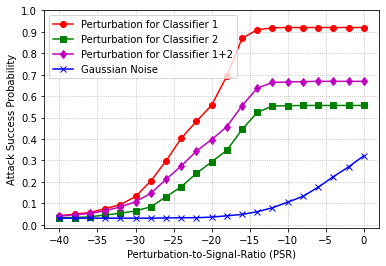

In [803]:
fig = plt.figure()
# plt.title('Attack on Classifier 1')
plt.plot(range(dBrange , 1, 2), a1FNN, 'ro-', label = 'Perturbation for Classifier 1')
plt.plot(range(dBrange , 1, 2), a2FNN, 'gs-', label = 'Perturbation for Classifier 2')
plt.plot(range(dBrange , 1, 2), a3FNN, 'md-', label = 'Perturbation for Classifier 1+2')
plt.plot(range(dBrange , 1, 2), a4FNN, 'bx-', label = 'Gaussian Noise')
plt.legend(loc="upper left")
# plt.legend(bbox_to_anchor=(0.01, 0.01), loc="lower left", borderaxespad=0)
plt.xlabel('Perturbation-to-Signal-Ratio (PSR)')
plt.ylabel('Attack Success Probability')
plt.grid(linestyle='dotted')
aa = plt.xticks(np.arange(dBrange,0+0.1, 5)) 
bb = plt.yticks(np.arange(0,1+0.1, 0.1)) 
plt.savefig('attack_on_class1FNN.pdf') 

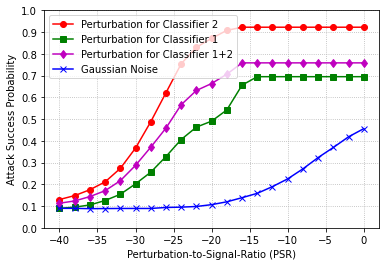

In [804]:
fig = plt.figure()
# plt.title('Attack on Classifier 2')
plt.plot(range(dBrange , 1, 2), b1FNN, 'ro-', label = 'Perturbation for Classifier 2')
plt.plot(range(dBrange , 1, 2), b2FNN, 'gs-', label = 'Perturbation for Classifier 1')
plt.plot(range(dBrange , 1, 2), b3FNN, 'md-', label = 'Perturbation for Classifier 1+2')
plt.plot(range(dBrange , 1, 2), b4FNN, 'bx-', label = 'Gaussian Noise')
plt.legend(loc="upper left")
# plt.legend(bbox_to_anchor=(0.01, 0.01), loc="lower left", borderaxespad=0)
plt.xlabel('Perturbation-to-Signal-Ratio (PSR)')
plt.ylabel('Attack Success Probability')
plt.grid(linestyle='dotted')
aa = plt.xticks(np.arange(dBrange,0+0.1, 5)) 
bb = plt.yticks(np.arange(0,1+0.1, 0.1)) 
plt.savefig('attack_on_class2FNN.pdf') 

attack success: 0.983
0.051
0.054
0.061
0.074
0.094
0.138
0.211
0.327
0.428
0.482
0.523
0.611
0.854
0.969
0.979
0.982
0.983
0.983
0.983
0.983
0.982


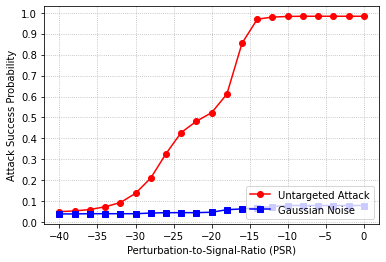

In [31]:
# targeted attack

loss_object = tf.keras.losses.CategoricalCrossentropy()

# def create_adversarial_pattern(input_image, input_label, model):
#     with tf.GradientTape() as tape:
#         tape.watch(input_image)
#         prediction = model(input_image)
#         loss = loss_object(input_label, prediction)
#         # Get the gradients of the loss w.r.t to the input image.
#         gradient = tape.gradient(loss, input_image)
#   # Get the sign of the gradients to create the perturbation
#     signed_grad =  tf.sign(gradient)
# #     signed_grad = gradient
#     return signed_grad

# def create_adversarial_pattern_joint(input_image, input_label, modelA, modelB, consA):
#     with tf.GradientTape() as tape:
#         tape.watch(input_image)
#         predictionA = modelA(input_image)
#         lossA = loss_object(input_label, predictionA)
#         # Get the gradients of the loss w.r.t to the input image.
#         gradientA = tape.gradient(lossA, input_image)
#     with tf.GradientTape() as tape:
#         tape.watch(input_image)
#         predictionB= modelB(input_image)
#         lossB = loss_object(input_label, predictionB)
#         # Get the gradients of the loss w.r.t to the input image.
#         gradientB = tape.gradient(lossB, input_image)
#   # Get the sign of the gradients to create the perturbation
#     gradient = consA*gradientA + (1-consA)*gradientB
#     signed_grad =  tf.sign(gradient)
# #     signed_grad = gradient
#     return signed_grad



X_testhere = X_test_class1CNN
Y_testhere = Y_test_class1CNN
modelhere = model_class1CNN
cons_A = 1

modelA = model_class1CNN
modelB = model_class2CNN
# model_other = model_class1


# untargeted attack
# X_tensor = tf.convert_to_tensor(X_testhere)
# Y_test4 = np_utils.to_categorical(Y_test, num_classes)

# delta_tf = create_adversarial_pattern(X_tensor, Y_test, model)

# delta_tf_1 = create_adversarial_pattern(X_tensor, Y_test, model_class1)
# delta_tf_2 = create_adversarial_pattern(X_tensor, Y_test, model_class2)
# delta_tf = cons_A * delta_tf_1 + (1-cons_A) * delta_tf_2

# delta_tf = create_adversarial_pattern_joint(X_tensor, Y_testhere, modelA, modelB, cons_A)

target_label = int(0)
original_label = int((target_label + 1) % 2)

dd1 = np.argmax(Y_testhere,axis=1)
dd = np.where(dd1==original_label)
X_testdd = X_testhere[dd]
Y_testdd = Y_testhere[dd]
X_tensordd = tf.convert_to_tensor(X_testdd)
Y_test3 = target_label * np.ones(len(X_testdd))
Y_test4 = np_utils.to_categorical(Y_test3, num_classes)
delta_tf = create_adversarial_pattern_joint(X_tensordd, Y_test4, modelA, modelB, cons_A)


delta_np = delta_tf.numpy()
# delta = (delta_np/np.sqrt(np.sum(delta_np**2))) 
# delta = - np.sign(delta_np)
delta = -delta_np/math.sqrt(2)
# rec_noise = math.sqrt(1/(2*EbNo_train))*np.random.randn(len(delta),len(delta[0]))
PNR = -3
# epsilon = math.sqrt(2)*10**((PNR - dB_sensing)/20) 
S_dB = 10*math.log10((np.sum(X_testdd**2))/len(X_testdd))
dB_epsilon = S_dB + PNR
epsilon = pow(10,dB_epsilon/10)

epi = epsilon*delta
aa = (modelhere.predict(X_testdd+epi))
bb = np.argmax(aa,axis=1)
cc = np.argmax(Y_test4,axis=1)
no_errors = (cc == bb)
no_errors =  no_errors.astype(int).sum()
print('attack success:', no_errors/len(cc))

# as a function of PNR
targeted_success_vec10 = []
targeted_success_vec10G = []
dx = delta.shape
if len(dx) == 2:
    Gnoise = (1/math.sqrt(2))*np.random.randn(dx[0],dx[1])
elif len(dx) == 3:
    Gnoise = (1/math.sqrt(2))*np.random.randn(dx[0],dx[1],dx[2])
# Gnoise = (1/math.sqrt(2))*np.random.randn(len(delta),len(delta[0]))
dBrange = -40
for PNR in range(dBrange,1,2):
#     epsilon = math.sqrt(2)*10**((PNR - dB_sensing)/20) 
#     delta_power = np.sum(delta**2)
#     noise_power = (sample_size/2)*len(X_test)
#     epsilon = math.sqrt(10**(PNR/10) * noise_power/delta_power)
#     S_dB = 10*math.log10((np.sum(X_test**2))/len(X_test))
    S_dB = 10*math.log10((np.sum(X_testdd**2))/(np.sum(delta**2)))
    dB_epsilon = S_dB + PNR
    epsilon = math.sqrt(pow(10,dB_epsilon/10))
    epi = epsilon*delta
    aa = (modelhere.predict(X_testdd+epi))
    bb = np.argmax(aa,axis=1)
    cc = np.argmax(Y_test4,axis=1)
#     no_errors = (cc == bb)
#     no_errors =  no_errors.astype(int).sum()
#     print('attack success:', no_errors/len(cc))
#     untargeted_success_vec.append(no_errors/len(cc))
    
    
#     cc = np.argmax(Y_testdd,axis=1)
    # no_errors = (cc != bb)
    # no_errors =  no_errors.astype(int).sum()
    # print(1-no_errors/len(cc))
    attack_success = (bb == target_label)
    attack_success = attack_success.astype(int).sum()
    print(attack_success/len(cc))
    targeted_success_vec10.append(attack_success/len(cc))
    
    # Add new for normalization
    S_dB = 10*math.log10((np.sum(X_testdd**2))/(np.sum(Gnoise**2)))
    dB_epsilon = S_dB + PNR
    epsilon = math.sqrt(pow(10,dB_epsilon/10))
    
    epiG = epsilon*Gnoise
    aaG = (modelhere.predict(X_testdd+epiG))
    bbG = np.argmax(aaG,axis=1)
    ccG = np.argmax(Y_test4,axis=1)
    ccG = np.argmax(Y_testdd,axis=1)
    # no_errors = (cc != bb)
    # no_errors =  no_errors.astype(int).sum()
    # print(1-no_errors/len(cc))
    attack_successG = (bbG == target_label)
    attack_successG = attack_successG.astype(int).sum()
    targeted_success_vec10G.append(attack_successG/len(ccG))
#     no_errorsG = (ccG == bbG)
#     no_errorsG =  no_errorsG.astype(int).sum()
#     print('attack success:', no_errorsG/len(ccG))
#     untargeted_success_vecG.append(no_errorsG/len(ccG))

for i in range (len(targeted_success_vec10)-1):
    if targeted_success_vec10[i+1] < targeted_success_vec10[i]:
        targeted_success_vec10[i+1] = targeted_success_vec10[i]

for i in range (len(targeted_success_vec10G)-1):
    if targeted_success_vec10G[i+1] < targeted_success_vec10G[i]:
        targeted_success_vec10G[i+1] = targeted_success_vec10G[i]
        
# untargeted_success_vec_new = np.zeros(len(untargeted_success_vec))
# untargeted_success_vec_new[0] = untargeted_success_vec[0]
# print(len(untargeted_success_vec))
# for i in range (len(untargeted_success_vec)-1):
#     if untargeted_success_vec[i+1] < untargeted_success_vec[i]:
# #         untargeted_success_vec[i+1] = untargeted_success_vec[i]
#         add_on = untargeted_success_vec[i] - untargeted_success_vec[i+1]
#         untargeted_success_vec_new[i+1] = min(1,untargeted_success_vec_new[i] + add_on)
#         if untargeted_success_vec_new[i+1] == 1:
#             untargeted_success_vec_new[i+1:] = 1
#             break
#     else:
#         untargeted_success_vec_new[i+1] = untargeted_success_vec[i+1]
# untargeted_success_vec = untargeted_success_vec_new


fig = plt.figure()
plt.plot(range(dBrange , 1, 2), targeted_success_vec10, 'ro-', label = 'Untargeted Attack')
plt.plot(range(dBrange , 1, 2), targeted_success_vec10G, 'bs-', label = 'Gaussian Noise')
plt.legend(loc="lower right")
# plt.legend(bbox_to_anchor=(0.01, 0.01), loc="lower left", borderaxespad=0)
plt.xlabel('Perturbation-to-Signal-Ratio (PSR)')
plt.ylabel('Attack Success Probability')
plt.grid(linestyle='dotted')
aa = plt.xticks(np.arange(dBrange,0+0.1, 5)) 
bb = plt.yticks(np.arange(0,1+0.1, 0.1)) 




In [898]:
# a for classifier1, 1 for perturbation for classifier i, 2 for perturbation for other classifier, 3 for perturbation for classifier1+2, 4 for Gaussian noise 
a3targetFNN = targeted_success_vec10
a4targetFNN = targeted_success_vec10G

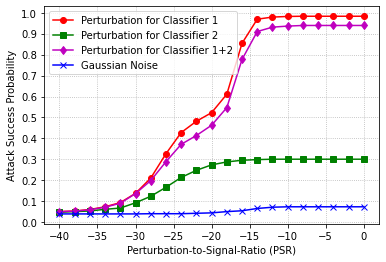

In [892]:
fig = plt.figure()
# plt.title('Attack on Classifier 1')
plt.plot(range(dBrange , 1, 2), a1targetCNN, 'ro-', label = 'Perturbation for Classifier 1')
plt.plot(range(dBrange , 1, 2), a2targetCNN, 'gs-', label = 'Perturbation for Classifier 2')
plt.plot(range(dBrange , 1, 2), a3targetCNN, 'md-', label = 'Perturbation for Classifier 1+2')
plt.plot(range(dBrange , 1, 2), a4targetCNN, 'bx-', label = 'Gaussian Noise')
plt.legend(loc="upper left")
# plt.legend(bbox_to_anchor=(0.01, 0.01), loc="lower left", borderaxespad=0)
plt.xlabel('Perturbation-to-Signal-Ratio (PSR)')
plt.ylabel('Attack Success Probability')
plt.grid(linestyle='dotted')
aa = plt.xticks(np.arange(dBrange,0+0.1, 5)) 
bb = plt.yticks(np.arange(0,1+0.1, 0.1)) 
plt.savefig('targeted_attack_on_class1CNN.pdf') 

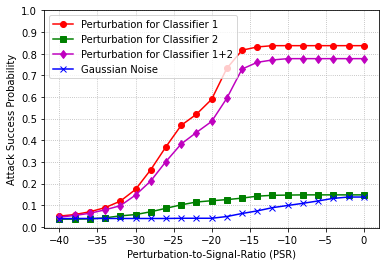

In [899]:
fig = plt.figure()
# plt.title('Attack on Classifier 1')
plt.plot(range(dBrange , 1, 2), a1targetFNN, 'ro-', label = 'Perturbation for Classifier 1')
plt.plot(range(dBrange , 1, 2), a2targetFNN, 'gs-', label = 'Perturbation for Classifier 2')
plt.plot(range(dBrange , 1, 2), a3targetFNN, 'md-', label = 'Perturbation for Classifier 1+2')
plt.plot(range(dBrange , 1, 2), a4targetFNN, 'bx-', label = 'Gaussian Noise')
plt.legend(loc="upper left")
# plt.legend(bbox_to_anchor=(0.01, 0.01), loc="lower left", borderaxespad=0)
plt.xlabel('Perturbation-to-Signal-Ratio (PSR)')
plt.ylabel('Attack Success Probability')
plt.grid(linestyle='dotted')
aa = plt.xticks(np.arange(dBrange,0+0.1, 5)) 
bb = plt.yticks(np.arange(0,1+0.1, 0.1)) 
plt.savefig('targeted_attack_on_class1FNN.pdf') 